## *Women's Rights and Economic Growth*

Jodi Chao

MBA Data Bootcamp

May 13, 2016

**Overview**

This project explores the relationship, if any, between women's rights and GDP growth. Studies have shown that empowering women economically has a positive effect on her family's wellbeing and on the surrounding community. Does this dynamic extend to the wellbeing of her country? This project does not attempt to establish any kind of causal relationship. Rather, it will examine data on women's political and economic rights against data on GDP growth, with this central question: do countries governments that respect the rights of their female citizens see a higher level of economic growth?   

Due to the constraints on this project, we limit our scope to Central America. 

**Data Sources**

*CIRI Human Rights Dataset*

The CIRI Human Rights Dataset [(www.humanrightsdata.com)](http://www.humanrightsdata.com) contains standards-based quantitative information on government respect for a wide range of internationally-recognized human rights for countries of all regime-types and from all regions of the world.

The selection of the particular rights in the CIRI dataset does not imply that these rights are considered to be more important than other human rights. Rather, these are the rights for which we have reliable and systematically available information across time and space. CIRI includes measures of the practices of governments that allow or impede citizens who wish to exercise their:

* Physical integrity rights--the rights not to be tortured, summarily executed, disappeared, or imprisoned for political beliefs. 
* Civil liberties such as free speech, freedom of association and assembly, freedom of movement, freedom of religion, and the right to participate in the selection of government leaders.
* Workers’ rights
* Rights of women to equal treatment politically, economically, and socially.

The CIRI dataset includes information about 202 countries, for the years 1981 to 2011. For thirty-three of these countries, added in December 2004, data only exist for 2001 and 2003 and beyond. 

*World Bank Dataset*

The World Bank is an international financial institution that provides loans to developing countries for capital programs. It comprises two institutions: the International Bank for Reconstruction and Development (IBRD), and the International Development Association (IDA). The World Bank is also the source of a wealth of data on topics ranging from economic growth to climate change to social development, which it has made publicly available on [http://data.worldbank.org/](http://data.worldbank.org/)

**Accessing the Data**

Due to the limited scope of this project and some limitations to the CIRI dataset, the data represented below focuses on the years 2003-2011.

*Human Rights*
To access the CIRI Human Rights Dataset, one can download a file from the CIRI website and upload the data from your computer using the code below. 
* **Step 1**: Opening your web browser, navigate to [http://www.humanrightsdata.com/p/data-documentation.html](http://www.humanrightsdata.com/p/data-documentation.html) 
* **Step 2**: Download the csv file to your local computer drive, renaming if you wish.
* **Step 3**: Use the code below to read the data into your jupyter notebook.

*GDP Growth*
The World Bank has its own databank and API that can be read in using pandas. To isolate specific indicators, one uses the assigned variable which can be found on the World Bank data website. The variable associated with the indicators within this project are as follows:

* **GDP Growth (annual %):** NY.GDP.MKTP.KD.ZG

Using these variable codes and the python code below, one can read in the relevant data series for analysis.

In [197]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
import os                              # to read in filefrom computer
from pandas.io import data, wb         # worldbank data
import colorlover as cl                # colors!

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()
import pandas as pd # importing pandas package
import os

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

#Human Rights Data
file = 'CIRI Data 1981_2011 2014.04.14.csv' # assign filename as string to variable file
cwd = 'C:/Users/Jodi/Documents/Data_Bootcamp/Final Project' # assign directory address as string to variable cwd

os.chdir(cwd) # set current working directory

print('Current Working Directory is', os.getcwd())
print('File exists?', os.path.isfile(file)) # check to see if file is there

ciridf= pd.read_csv(file)

#GDP Growth Data
vargdp = ['NY.GDP.MKTP.KD.ZG'] # GDP Growth annual %
centamiso = ['BLZ','CRI','SLV','GTM','HND','NIC','PAN']
beginyear = 2003
endyear = 2011

centamgdpwbdf = wb.download(indicator=vargdp, country=centamiso, start=beginyear, end=endyear)

Python version: 3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Plotly version:  1.9.10
Today:  2016-05-13
Current Working Directory is C:\Users\Jodi\Documents\Data_Bootcamp\Final Project
File exists? True


In [198]:
#cleaning up the dataframe
ciridf=ciridf.drop(['CIRI','COW','POLITY','UNCTRY','UNREG','UNSUBREG','PHYSINT','DISAP','KILL','POLPRIS','TORT','OLD_EMPINX',
             'NEW_EMPINX','ASSN','FORMOV','DOMMOV','OLD_MOVE','SPEECH','ELECSD','OLD_RELFRE','NEW_RELFRE','WORKER',
              'INJUD','WOSOC'], axis=1) #dropping irrelevant columns
ciridf = ciridf.where((pd.notnull(ciridf)), None)
ciridf = ciridf[ciridf['YEAR']>=2003] #dropping data before 2003
ciridf = ciridf.rename(columns={'CTRY':'Country','YEAR':'Year','WECON':'Women Economic Rights',
               'WOPOL':'Women Political Rights'})

In [199]:
#grouping the countries into a region
centamlist = ['Belize','Costa Rica','El Salvador','Guatemala','Honduras','Nicaragua','Panama']
centamciridf = ciridf[ciridf.Country.isin(centamlist)]

In [200]:
centamciridf = centamciridf.set_index('Country') #setting Country as index

## Defining Terms
*All definitions taken from CIRI data documentation.*

The indicators included in this project rank each country from 0 to 3, with 0 being the least respect for rights and 3 being the most. This level of respect is measured by the extent to which right are guaranteed within law and enforced by the government. In a country rated 0, one might find systematic discrimination against women built into the law. In a country rated 3, one would find virtually all rights for women guaranteed by law and also enforced by the government.

**Women's Economic Rights**

Women's economic rights include a number of internationally recognized rights. These rights include:

* Equal pay for equal work
* Free choice of profession or employment without the need to obtain a husband or male relative's consent
* The right to gainful employment without the need to obtain a husband or male relative's consent
* Equality in hiring and promotion practices
* Job security (maternity leave, unemployment benefits, no arbitrary firing or layoffs, etc...)
* Non-discrimination by employers
* The right to be free from sexual harassment in the workplace
* The right to work at night
* The right to work in occupations classified as dangerous
* The right to work in the military and the police force

**Women's Political Rights**

Women’s political rights include a number of internationally recognized rights. These rights include:

* The right to vote
* The right to run for political office
* The right to hold elected and appointed government positions
* The right to join political parties
* The right to petition government officials


### Women's Rights in Central America in 2003 vs. 2010
We see below that in 2003, Costa Rica led the region in its respect for women's right with a score of 2 on economic rights and score of 3 on political rights. Honduras and Nicaragua score similar to their neighbors on economic rights, but receive full scores on guaranteeing political rights for their female citizens.

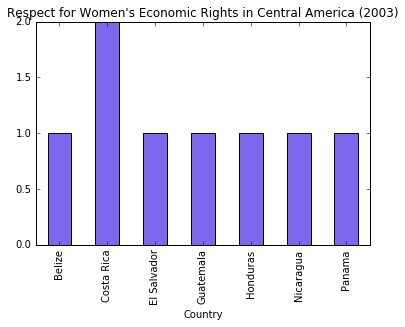

In [201]:
centamciridf['Women Economic Rights'][centamciridf['Year']==2003].plot(kind='bar',
            title="Respect for Women's Economic Rights in Central America (2003)", color="mediumslateblue")

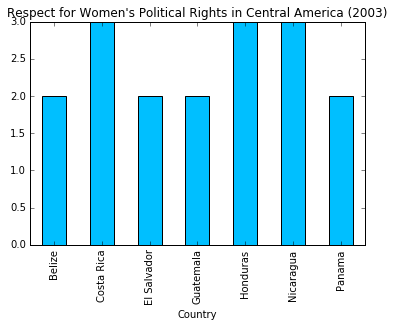

In [202]:
centamciridf['Women Political Rights'][centamciridf['Year']==2003].plot(kind='bar',
            title="Respect for Women's Political Rights in Central America (2003)", color="deepskyblue")

Looking at these indicators for the same countries in 2010, one sees that Costa Rica again leads the pack, with a full score on both economic and political rights for women. Honduras and Nicaragua fell in their respect for women's political rights, leaving them on par with the region. Belize and Panama increased their respect for women's economic rights. 

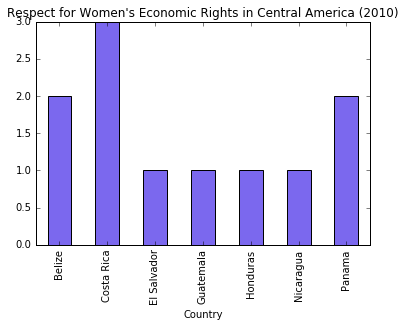

In [203]:
centamciridf['Women Economic Rights'][centamciridf['Year']==2010].plot(kind='bar',
            title="Respect for Women's Economic Rights in Central America (2010)", color="mediumslateblue")

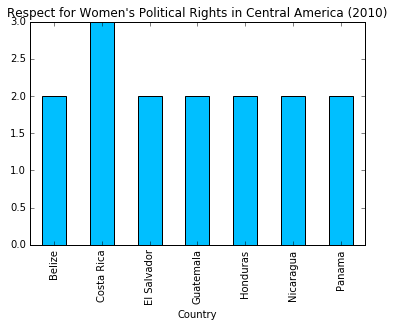

In [204]:
centamciridf['Women Political Rights'][centamciridf['Year']==2010].plot(kind='bar',
            title="Respect for Women's Political Rights in Central America (2010)", color="deepskyblue")

Based on the findings above, let's drill down on the shining star in the pack (Costa Rica), a country that regresed (Nicaragua) and a middle of the road performer (El Salvador) to see what their performance over time has been on these indicators.

**Costa Rica**

Costa Rica has been consistently high over time for both respect of political and economic rights, with a stronger record for political rights.

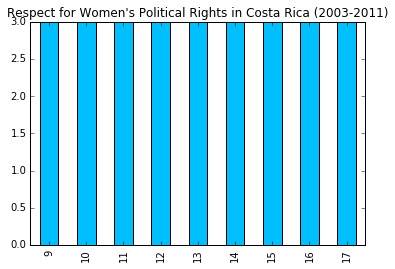

In [242]:
costaricaciridf = centamciridf.reset_index()
costaricaciridf = costaricaciridf.drop(costaricaciridf.columns[0],axis=1)
costaricaciridf = costaricaciridf[costaricaciridf['Country']=='Costa Rica']
costaricaciridf['Women Political Rights'].plot(kind='bar',
            title="Respect for Women's Political Rights in Costa Rica (2003-2011)", color="deepskyblue")

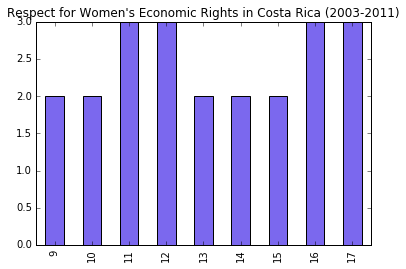

In [245]:
costaricaciridf['Women Economic Rights'].plot(kind='bar',
            title="Respect for Women's Economic Rights in Costa Rica (2003-2011)", color="mediumslateblue")

**Nicaragua**

Looking at Nicaragua over time, one sees that its drop in respect for political rights from 2003 stayed consistent until 2008 when it spiked again and then dropped through the end of the period covered by this data. Interestingly, its spike in economic rights over the 8 year period took place in 2007, the year before its spike in political rights. Whether there is a correlation between women's economic rights and political rights (one facilitating the other) requires further examination.

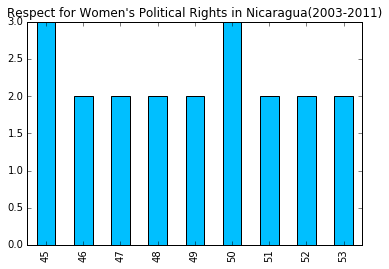

In [248]:
nicciridf = centamciridf.reset_index()
nicciridf = nicciridf.drop(nicciridf.columns[0],axis=1)
nicciridf = nicciridf[nicciridf['Country']=='Nicaragua']
nicciridf['Women Political Rights'].plot(kind='bar',
            title="Respect for Women's Political Rights in Nicaragua(2003-2011)", color="deepskyblue")

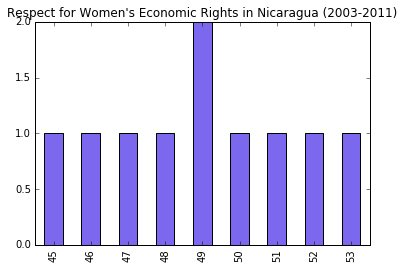

In [249]:
nicciridf['Women Economic Rights'].plot(kind='bar',
            title="Respect for Women's Economic Rights in Nicaragua (2003-2011)", color="mediumslateblue")

** El Salvador **

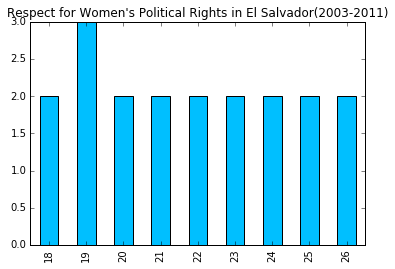

In [250]:
salvciridf = centamciridf.reset_index()
salvciridf = salvciridf.drop(salvciridf.columns[0],axis=1)
salvciridf = salvciridf[salvciridf['Country']=='El Salvador']
salvciridf['Women Political Rights'].plot(kind='bar',
            title="Respect for Women's Political Rights in El Salvador(2003-2011)", color="deepskyblue")

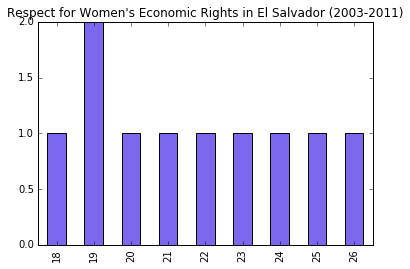

In [251]:
salvciridf['Women Economic Rights'].plot(kind='bar',
            title="Respect for Women's Economic Rights in El Salvador (2003-2011)", color="mediumslateblue")

### GDP Growth: Costa Rica, Nicaragua, El Salvador

Now, let's turn to the question of whether a high level of respect for women's rights has translated into economic wellbeing at a country level. To do this, we look at GDP growth rather than absolute GDP in order to more easily compare countries despite differences in GDP size. 


In [256]:
centamgdpwbdf = centamgdpwbdf.reset_index()  # getting rid of multiindex for ease of graphing and comparison
centamgdpwbdf = centamgdpwbdf.rename(columns={'NY.GDP.MKTP.KD.ZG':'Annual GDP Growth'})

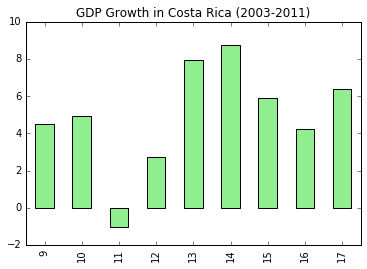

In [271]:
costaricawbdf = centamgdpwbdf[centamgdpwbdf['country']=='Costa Rica']
costaricawbdf = costaricawbdf.drop(costaricawbdf.columns[0],axis=1)

costaricawbdf['Annual GDP Growth'].plot(kind='bar',
            title="GDP Growth in Costa Rica (2003-2011)", color="lightgreen")

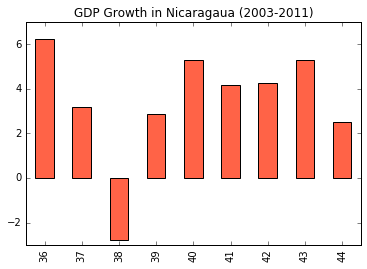

In [268]:
nicwbdf = centamgdpwbdf[centamgdpwbdf['country']=='Nicaragua']
nicwbdf = nicwbdf.drop(nicwbdf.columns[0],axis=1)

nicwbdf['Annual GDP Growth'].plot(kind='bar',
            title="GDP Growth in Nicaragaua (2003-2011)", color="tomato")

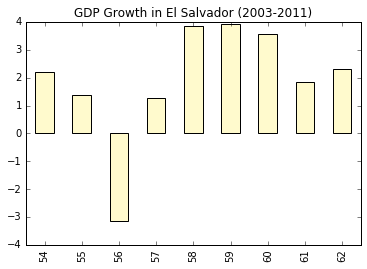

In [269]:
salvwbdf = centamgdpwbdf[centamgdpwbdf['country']=='El Salvador']
salvwbdf = salvwbdf.drop(salvwbdf.columns[0],axis=1)

salvwbdf['Annual GDP Growth'].plot(kind='bar',
            title="GDP Growth in El Salvador (2003-2011)", color="lemonchiffon")

## Conclusion ##

Based on the charts above, there appears to be little to no pattern in correlation between GDP growth and respect for women's rights as measured by the CIRI Human Rights datset. However, this does not necessarily allow one to conclude that there is in fact no correlation. There may be many factors obscuring any potential correlation including:

* *Time effect*: it might be that any negative consequences for a country's lack of respect for womens rights does not show up in data until years later
* *Indicator issue*: it might be that the indicators chosen above (both in human rights and in economic wellbeing) are not the most precise proxies to use in answering this question
* *Social rights*: it might be that while these countries score highly on political and economic rights for women, the social rights of women is lower with a detrimental effect.

Ultimately, the impact of empowering women both politically and economically on a country's overall economic health and growth warrants more study. If a correlation is found, this could be an additionally compelling case for countries to prioritize the empowerment of women in legislation, in society, and in positions of influence.